## barplot
- seaborn 라이브러리에서 제공하는 함수 중 하나로, 범주형 변수와 수치형 변수 간의 관계를 시각화할 때 사용


## 완성된 코드

Sun 21.41


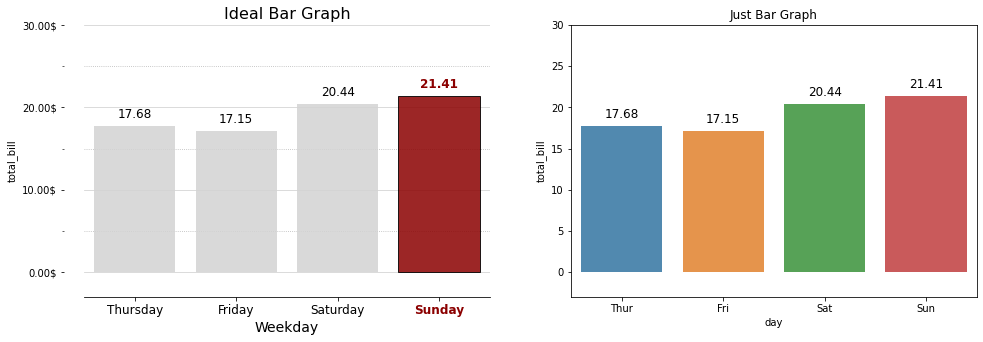

In [41]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

def major_formatter(x, pos):
   return "%.2f$" % x # 21.10$ 

formatter = FuncFormatter(major_formatter)

tips = sns.load_dataset('tips')

# 데이터 가공
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
print(h_day, h_mean)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
ax0 = sns.barplot(x = 'day', y = 'total_bill', data = tips, 
                  errorbar = None, color = 'lightgray', 
                  alpha = 0.85, zorder=2, ax = ax[0])
for p in ax0.patches:
  fontweight = 'normal'
  color = 'k'
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight = 'bold'
    color = 'darkred'
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height + 1, height, 
           ha = 'center', size=12, fontweight = fontweight, color = color)

# y축 변환
ax0.set_ylim(-3, 30)

# y축 타이틀 
ax0.set_title('Ideal Bar Graph', size = 16)

# 옵션 1
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["left"].set_position(('outward', 20))

# 옵션 2
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

# 옵션 3
ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel('Weekday', fontsize=14)
for xtick in ax0.get_xticklabels():
  #print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color('darkred')
    xtick.set_fontweight('demibold')
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

###################

ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  errorbar=None, alpha=0.85, 
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()

plt.show()

## 코드 해석

In [42]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

matplotlib 라이브러리에서 ticker 모듈을 불러와서,

 다양한 축의 눈금(tick) 위치를 설정하는 클래스와 함수를 제공
- MultipleLocator: 축의 눈금 위치를 지정된 간격의 배수로 설정하는 클래스입니다.
- AutoMinorLocator: 축의 눈금 위치를 자동으로 설정하고, 보조 눈금을 만드는 클래스입니다.
- FuncFormatter: 축의 눈금 레이블을 사용자 정의 함수를 이용해 포맷팅하는 클래스입니다.

In [43]:
def major_formatter(x, pos):
   return "%.2f$" % x # 21.10$ 

formatter = FuncFormatter(major_formatter) # 축의 눈금 레이블

tips = sns.load_dataset('tips') #'tips'는 seaborn 패키지에 포함된 예제 데이터셋 중 하나

# 데이터 가공
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
print(group_mean)

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


- tips.groupby(['day']): tips 데이터셋을 day 변수로 그룹화합니다.
- ['total_bill']: total_bill 변수에 대해서만 그룹화된 결과를 산출합니다.
- .agg('mean'): total_bill 변수에 대한 평균값을 계산합니다.

In [44]:
h_day = group_mean.sort_values(ascending=False).index[0] # total_bill 변수의 평균값을 내림차순으로 정렬하여 index[0] (= 평균값이 가장 높은)을 불러오는 코드
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2) #소수점 둘째자리에서 반올림하여 계산하는 코드 : total_bill 변수의 평균값이 가장 큰 값
print(h_day, h_mean)

Sun 21.41


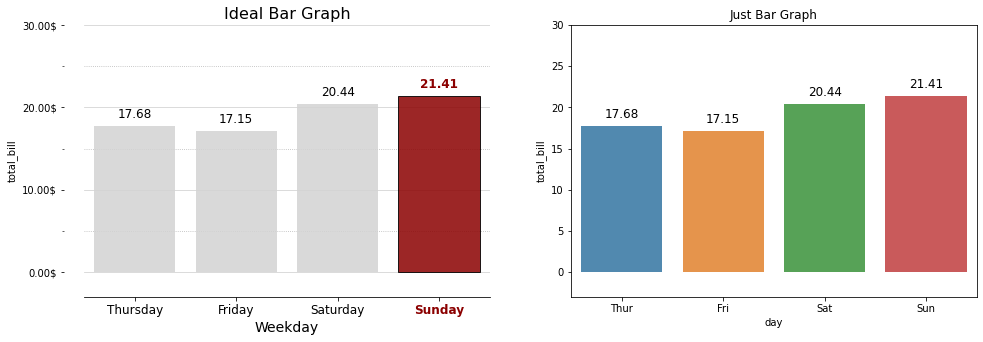

In [47]:
#시각화 코드 작성
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
ax0 = sns.barplot(x = 'day', y = 'total_bill', data = tips, # 맨 아래에 주석 있음
                  errorbar = None, color = 'lightgray', 
                  alpha = 0.85, zorder=2, ax = ax[0])

for p in ax0.patches: #ax0.patches 각각의 막대(patches)를 순회하면서
  fontweight = 'normal' #폰트 굵기
  color = 'k' #검은색
  height = np.round(p.get_height(), 2) # 막대의 높이를 소수점 둘째자리에서 반올림 (p: patches)
  if h_mean == height: #당 막대 그래프가 가장 높은 값을 가지는 막대인 경우에 아래 코드들이 실행
    fontweight = 'bold'
    color = 'darkred'
    p.set_facecolor(color)
    p.set_edgecolor("black") #해당 막대 그래프의 테두리 색상
  ax0.text(p.get_x() + p.get_width()/2., height + 1, height, #해당 막대 그래프 위에 막대 높이 값을 나타내는 텍스트를 추가
           ha = 'center', size=12, fontweight = fontweight, color = color)
# y축 변환
ax0.set_ylim(-3, 30) # y축의 범위를 설정하는 코드

# y축 타이틀 
ax0.set_title('Ideal Bar Graph', size = 16)

# 옵션 1 : barplot의 축과 테두리 스타일을 설정하는 코드
ax0.spines["top"].set_visible(False) # x축 위쪽 테두리 선을 제거
ax0.spines["right"].set_visible(False) # y축 오른쪽 테두리 선을 제거
ax0.spines["left"].set_visible(False) # y축 왼쪽 테두리 선을 제거
ax0.spines["left"].set_position(('outward', 20))  # y축 왼쪽 테두리 선의 위치를 지정, y축 왼쪽 테두리 선을 바깥쪽으로 이동하고, 위치를 20만큼 조정

# 옵션 2 : barplot의 y축 눈금을 설정하는 코드
ax0.yaxis.set_major_locator(MultipleLocator(10)) #y축 주 눈금 간격을 10으로 설정
ax0.yaxis.set_major_formatter(formatter) # y축 주 눈금의 출력 형식을 설정

# #def major_formatter(x, pos):
#    return "%.2f$" % x # 21.10$ 
# formatter = FuncFormatter(major_formatter)

ax0.yaxis.set_minor_locator(MultipleLocator(5)) #y축 보조 눈금 간격을 5로 설정


# 옵션 3 :그리드 라인을 추가하는 코드
ax0.grid(axis="y", which="major", color="lightgray")
#axis 파라미터는 그리드 라인이 추가될 축을 지정
#which="major"로 설정되어 y축 주 눈금에 해당하는 위치에 라인이 추가
ax0.grid(axis="y", which="minor", ls=":")
#ls 파라미터는 추가될 라인의 스타일을 지정합니다. :로 설정되어 점선으로 추가

ax0.set_xlabel('Weekday', fontsize=14) 
for xtick in ax0.get_xticklabels(): #x축 눈금 라벨들을 출력하는 코드
  #print(xtick)
  if xtick.get_text() == h_day:  # h_day : Sun
    xtick.set_color('darkred')
    xtick.set_fontweight('demibold')
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

########################## 
ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  errorbar=None, alpha=0.85, 
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()

plt.show()


- seaborn 패키지의 barplot 함수를 이용하여 막대 그래프를 그립니다.
- x = 'day' : x축에 사용할 데이터 변수 이름으로 'day'를 지정합니다.
- y = 'total_bill' : y축에 사용할 데이터 변수 이름으로 'total_bill'을 지정합니다.
- data = tips : 그래프를 그릴 데이터셋으로 'tips'를 지정합니다.
- errorbar = None : 오차막대를 표시하지 않도록 None으로 지정합니다.
- color = 'lightgray' : 막대의 색상을 'lightgray'로 지정합니다.
- alpha = 0.85 : 막대의 투명도를 0.85로 지정합니다.
- zorder=2 : 그래프의 z-order를 2로 지정합니다. (막대 그래프가 다른 그래프 위에 그려질 때 우선순위를 결정하는 값) : 그리드 라인
- ax = ax[0] : 그래프를 그릴 axes 객체를 ax[0]으로 지정합니다.